In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def g_test(x, start=0.5, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

def metropolis(start, value, proposal, niter, nburn = 0):
    current = start
    post = [np.sum(current)]
    for i in range(niter):
        proposed = proposal(current)
        #p = value(proposed) / value(current)
        p = value(current) / value(proposed)
        if (np.random.uniform() < p):
            current = proposed
        post.append(np.sum(current))
    print(post[0])
    return post[nburn:]
    
def amount_of_black_ver(arr):
    return np.sum(arr)

def get_neighb(i, j, size):
    ind = [] 
    if ((0 <= i - 1 < size) and (0 <= j < size)):
        ind.append([i - 1, j])
    if ((0 <= i + 1 < size) and (0 <= j < size)):
        ind.append([i + 1, j])
    if ((0 <= i < size) and (0 <= j - 1 < size)):
        ind.append([i, j - 1])
    if ((0 <= i < size) and (0 <= j + 1 < size)):
        ind.append([i, j + 1])
    return ind

            
def prop(cur, size):
    neighb_conf = val(cur, size)
    i, j = neighb_conf[np.random.randint(len(neighb_conf))]
    arr = cur
    arr[i, j] += 1
    arr[i, j] = arr[i, j] % 2
    return arr

# counting possible configurations, which can be obtained by recoloring only 1 vertice of the current one
def val(arr, size):
    tmp = 0
    ind = []
    for i in range(size):
        for j in range(size):
            if (arr[i,j] == 1):
                ind.append([i, j])
            else:
                neighb = get_neighb(i, j, size)
                for k in range (len(neighb)):
                    tmp += arr[neighb[k][0], neighb[k][1]]
                if (tmp == 0):
                    ind.append([i,j])
                tmp = 0
    return ind

0.0
The mean amount of black vertices =  15.190008099919002


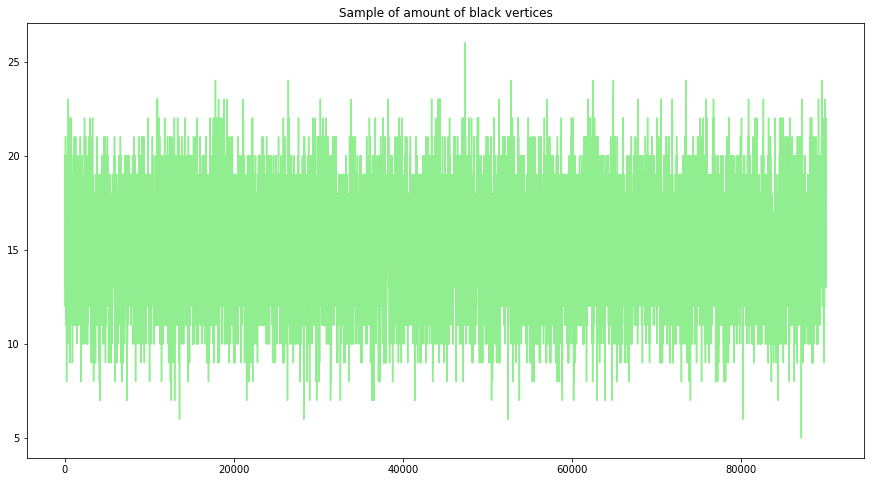

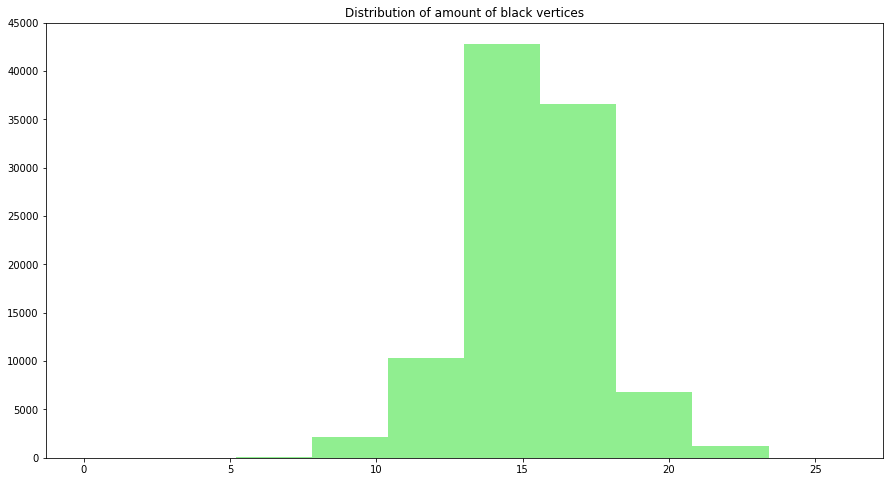

Ttest_indResult(statistic=0.6668196689555899, pvalue=0.504889038684476)

In [8]:
size = 8
start = np.zeros(shape = (size, size))

value = lambda x: len(val(x, size))
proposal = lambda x: prop(x, size)
post = metropolis(start, value, proposal, 100000)
res = np.array(post)

print("The mean amount of black vertices = ", res.mean())

plt.figure(figsize=(15,8))
plt.plot(res[10000:], color = 'lightgreen')
plt.title("Sample of amount of black vertices")
plt.show()

plt.figure(figsize=(15,8))
plt.hist(res, color = 'lightgreen')
plt.title("Distribution of amount of black vertices")
plt.show() 

g_test(res[10000:])